In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random
import PIL
from PIL import UnidentifiedImageError
from IPython.display import HTML

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import seaborn as sns

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
#from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style='darkgrid')

2025-08-22 16:18:21.232208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755879501.607345      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755879501.706087      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset_path=os.listdir('/kaggle/input/pestdataset/PestData')
print(dataset_path)

print("Type of classes labels found ",len(dataset_path))

['beetle', 'mites', 'grasshopper', 'sawfly', 'stem_borer', 'mosquito', 'catterpillar', 'weevil', 'moth', 'armyworm', 'aphids', 'bollworm']
Type of classes labels found  12


In [3]:
import os
import pandas as pd

class_labels = []

# Check what folders are in the dataset
dataset_path = "/kaggle/input/pestdataset/PestData"
folders = os.listdir(dataset_path)
print("Available folders:", folders)

for folder in folders:
    images = os.listdir(os.path.join(dataset_path, folder))
    for img in images:
        class_labels.append((folder, os.path.join(dataset_path, folder, img)))

df = pd.DataFrame(class_labels, columns=['Labels', 'image'])
print(df.head(10))
print(df.tail(10))


Available folders: ['beetle', 'mites', 'grasshopper', 'sawfly', 'stem_borer', 'mosquito', 'catterpillar', 'weevil', 'moth', 'armyworm', 'aphids', 'bollworm']
   Labels                                              image
0  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
1  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
2  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
3  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
4  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
5  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
6  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
7  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
8  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
9  beetle  /kaggle/input/pestdataset/PestData/beetle/jpg_...
        Labels                                              image
4292  bollworm  /kaggle/input/pestdataset/PestData/bollworm/jp...
4293  bollworm  /kaggle/input/pestdatas

In [4]:
print("Total number of images in dataset: ",len(df))

label_count=df['Labels'].value_counts()
print(label_count)

Total number of images in dataset:  4302
Labels
moth            497
grasshopper     486
weevil          485
catterpillar    434
sawfly          300
mites           300
beetle          300
mosquito        300
stem_borer      300
armyworm        300
aphids          300
bollworm        300
Name: count, dtype: int64


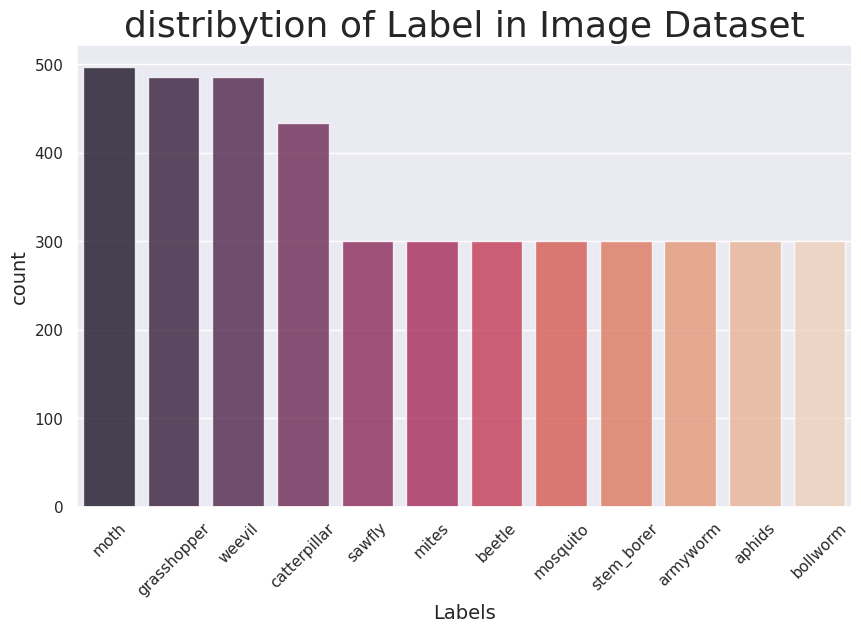

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
label_counts=df['Labels'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='rocket')
plt.title("distribytion of Label in Image Dataset", fontsize=26)
plt.xlabel("Labels",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.xticks(rotation=45)
plt.show()

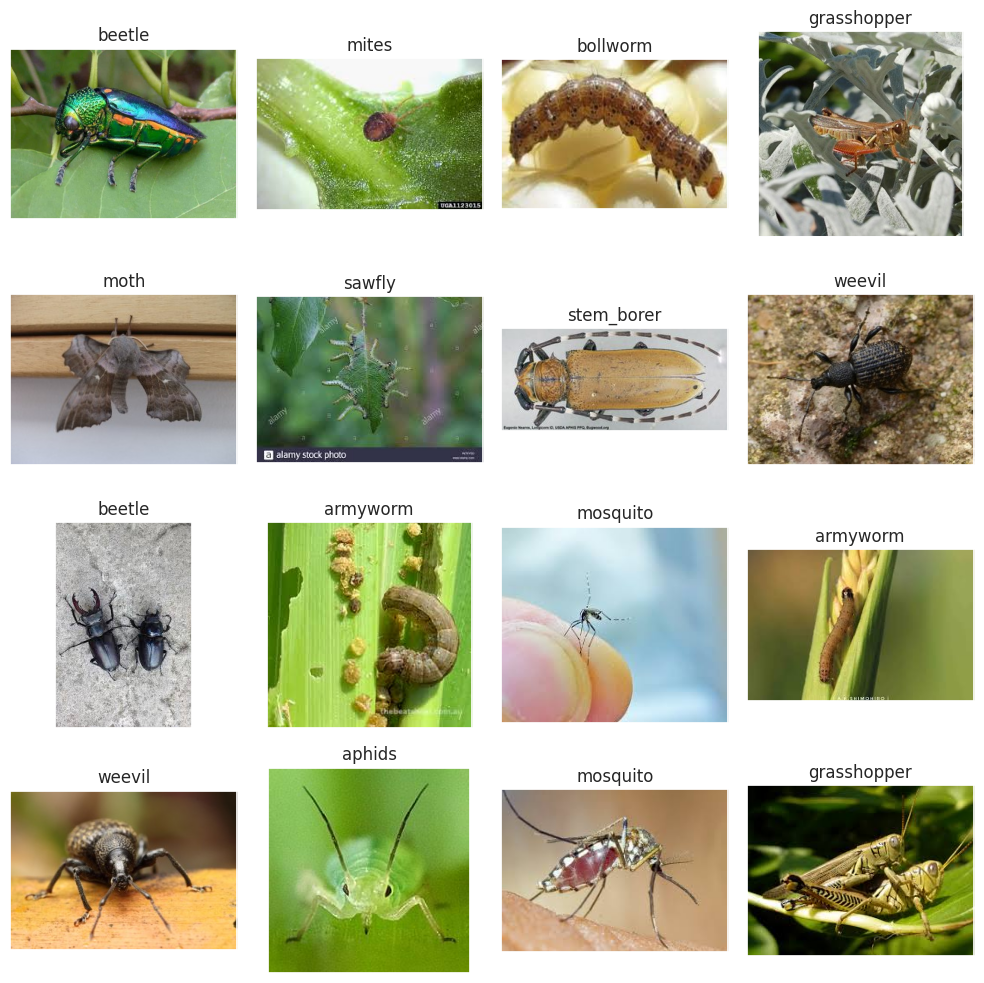

In [6]:
random_index=np.random.randint(0,len(df),16)
fig, axes=plt.subplots(nrows=4,ncols=4,figsize=(10,10), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[random_index[i]]))
    ax.set_title(df.Labels[random_index[i]])

plt.tight_layout()
plt.show()

In [7]:
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model

In [8]:
from sklearn.model_selection import train_test_split
train_df, test_df=train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [9]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input,  # Normalize images as required by EfficientNetV2
    validation_split=0.2  # Split 20% of the data for validation
)


test_generator=ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input
)

In [10]:
train_images=train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='Labels',
    target_size=(244,244),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_image=train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='Labels',
    target_size=(244,244),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images=test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='image',
    y_col='Labels',
    target_size=(244,244),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2753 validated image filenames belonging to 12 classes.
Found 688 validated image filenames belonging to 12 classes.
Found 861 validated image filenames belonging to 12 classes.


In [11]:
augment=tf.keras.Sequential([
    tf.keras.layers.Resizing(244,244),

    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.RandomFlip("horizontal"),

    tf.keras.layers.RandomRotation(0.1),

    tf.keras.layers.RandomZoom(0.1),

    tf.keras.layers.RandomContrast(0.1),
])

I0000 00:00:1755879547.872431      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755879547.873106      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [12]:
pretrained_model=tf.keras.applications.efficientnet_v2.EfficientNetV2M(
    input_shape=(244,244,3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable=False

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
# Create checkpoint callback with .weights.h5 extension
checkpoint_path = "pests_cats_classification_model_checkpoint.weights.h5"
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,  # Save only the weights, not the entire model
    monitor="val_accuracy",  # Monitor validation accuracy during training
    save_best_only=True  # Save only the best model weights based on validation accuracy
)

In [14]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 10,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training


In [15]:
# helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2025-08-22 16:19:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-08-22 16:19:15 (66.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [16]:
# Use the input layer from the pretrained base model
inputs = pretrained_model.input

# Apply data augmentation to the input images
x = augment(inputs)

# Add a dense layer with 128 units and ReLU activation on top of the pretrained model
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.35)(x)  # Apply dropout for regularization to prevent overfitting

# Add another dense layer with 256 units and ReLU activation
x = Dense(256, activation='relu')(x)
x = Dropout(0.35)(x)  # Another dropout layer for robustness

# Final output layer with 12 units (for 12 classes) and softmax activation for multiclass classification
outputs = Dense(12, activation='softmax')(x)

# Define the full model combining the pretrained base and custom head
model = Model(inputs=inputs, outputs=outputs)

# Compile the model with a low learning rate and appropriate loss and metric for classification
model.compile(
    optimizer=Adam(1e-4),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model
history = model.fit(
    train_images,  # Training data
    validation_data=val_image,  # Validation data
    epochs=50,  # Total number of training epochs
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", "pests_cats_classification"),  # Log training for TensorBoard
        checkpoint_callback,  # Save the best model weights during training
    ]
)

Saving TensorBoard log files to: training_logs/pests_cats_classification/20250822-161916


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1755879607.184973      64 service.cc:148] XLA service 0x7fe5d00ec870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755879607.186720      64 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755879607.186742      64 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755879612.884929      64 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1755879646.679707      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.1607 - loss: 3.3453

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.1613 - loss: 3.3382 - val_accuracy: 0.3881 - val_loss: 1.9478
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.3104 - loss: 2.1000 - val_accuracy: 0.5174 - val_loss: 1.6289
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 22s 251ms/step - accuracy: 0.4083 - loss: 1.8495 - val_accuracy: 0.5945 - val_loss: 1.4242
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 23s 260ms/step - accuracy: 0.4816 - loss: 1.6190 - val_accuracy: 0.6366 - val_loss: 1.2086
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 23s 266ms/step - accuracy: 0.5643 - loss: 1.3803 - val_accuracy: 0.7035 - val_loss: 1.1120
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.5744 - loss: 1.3281 - val_accuracy: 0.6991 - val_loss: 1.0430
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 22s 256ms/step - accuracy: 0.6022 - loss: 1.2457 - val_accuracy: 0.7238 - val_loss: 0.9724
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 23s 258ms/step - accuracy: 0.6256 - loss: 1.1821 - val_accuracy: 0.7500 

In [17]:
results=model.evaluate(test_images, verbose=0)

print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

 Test Loss: 0.23986
Test Accuracy: 92.92%


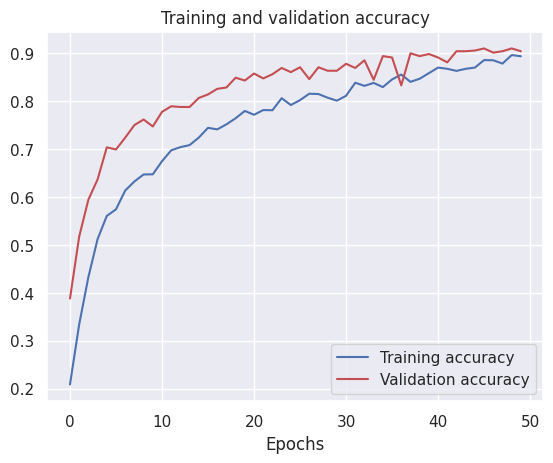

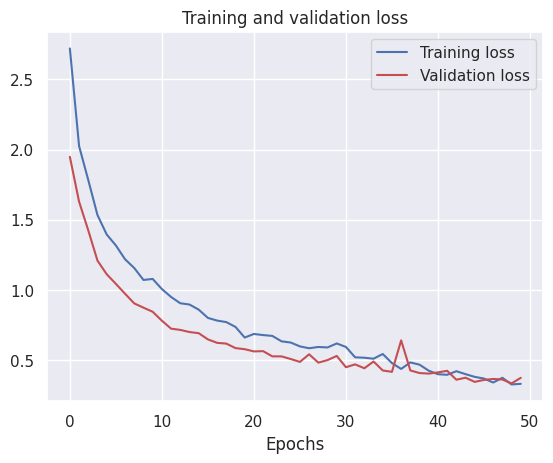

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.xlabel('Epochs')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
pred=model.predict(test_images)
pred=np.argmax(pred,axis=1)

labels=(train_images.class_indices)
labels = dict((v, k) for k, v in labels.items())

pred=[labels[k] for k in pred]

print(f'The first 5 predictions: {pred[:5]}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 790ms/step
The first 5 predictions: ['mites', 'bollworm', 'stem_borer', 'weevil', 'stem_borer']


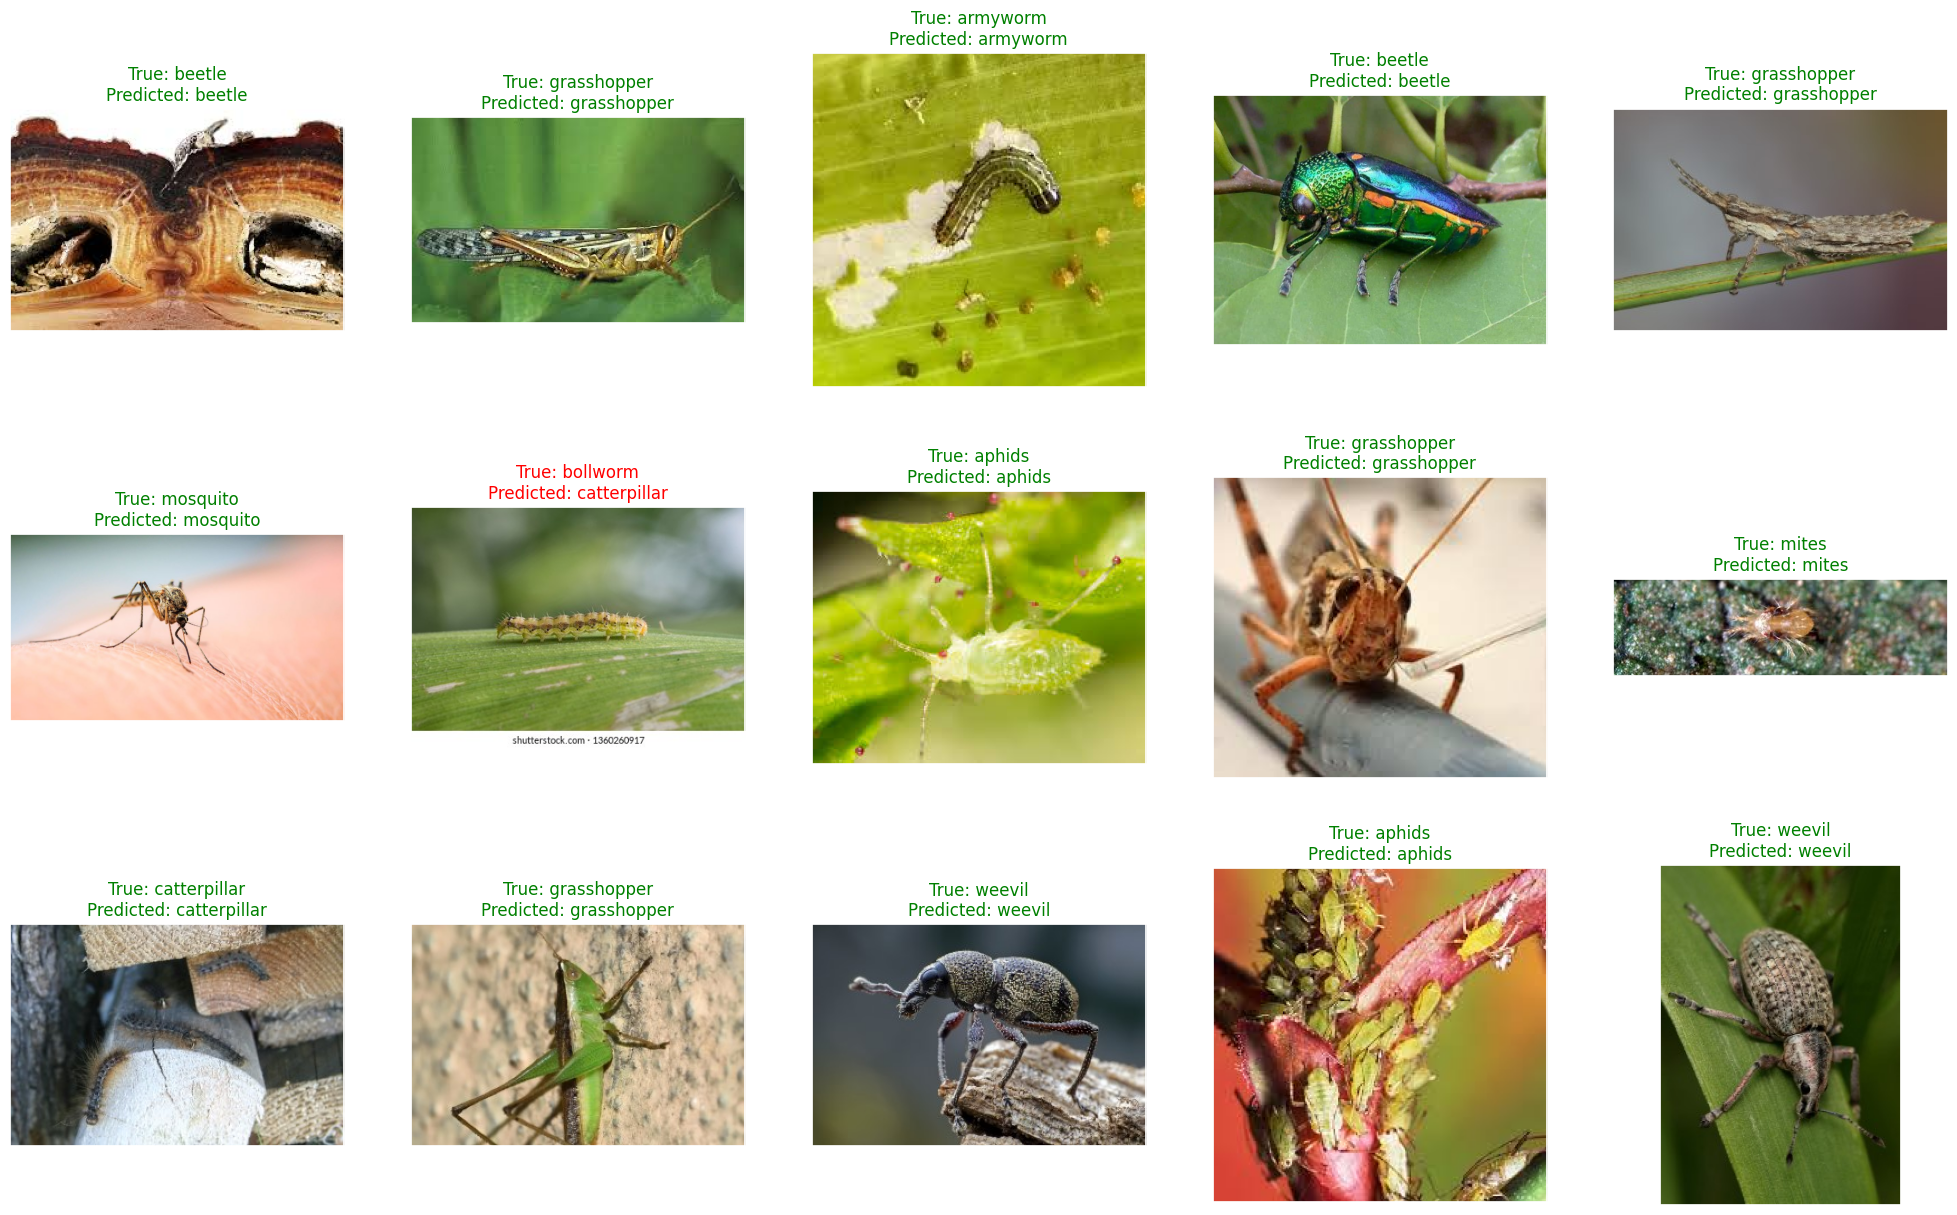

<Figure size 640x480 with 0 Axes>

In [20]:
# Display 15 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.image.iloc[random_index[i]]))
    if test_df.Labels.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Labels.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [21]:
y_test=list(test_df.Labels)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      aphids       0.92      0.96      0.94        71
    armyworm       0.96      0.90      0.93        49
      beetle       0.99      0.93      0.96        73
    bollworm       0.84      0.91      0.88        58
catterpillar       0.90      0.83      0.86        76
 grasshopper       0.99      0.92      0.95       103
       mites       0.95      0.95      0.95        60
    mosquito       0.92      1.00      0.96        58
        moth       0.91      0.96      0.93        81
      sawfly       0.98      0.92      0.95        63
  stem_borer       0.86      0.85      0.85        71
      weevil       0.93      1.00      0.97        98

    accuracy                           0.93       861
   macro avg       0.93      0.93      0.93       861
weighted avg       0.93      0.93      0.93       861



In [22]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False): 
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")


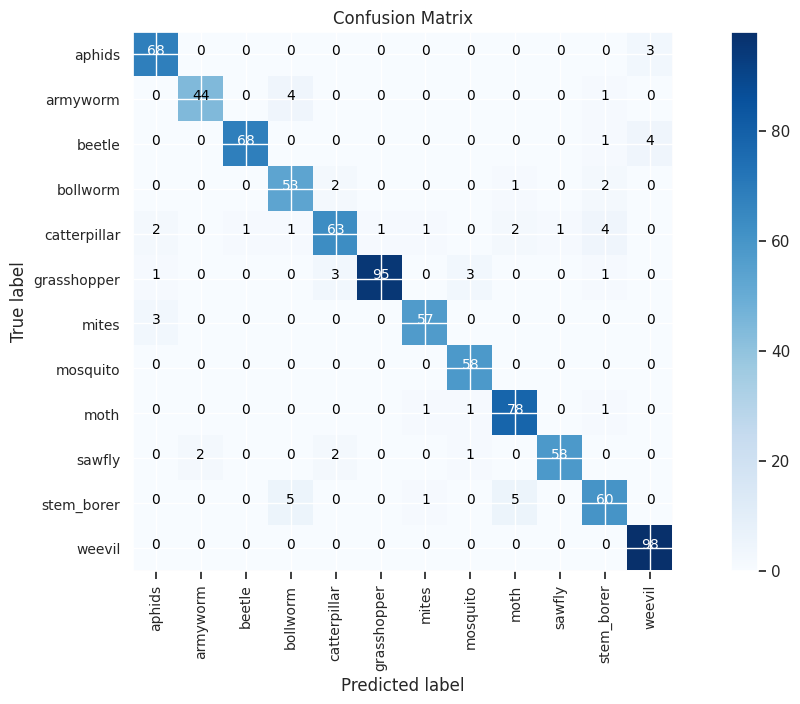

In [23]:
make_confusion_matrix(y_test, pred, list(labels.values()))

In [24]:
import os

file_name = "pests_cats_classification_model_checkpoint.weights.h5"

if os.path.exists(file_name):
    print(f"✅ File '{file_name}' exists in the current directory.")
else:
    print(f"❌ File '{file_name}' NOT found in the current directory.")


✅ File 'pests_cats_classification_model_checkpoint.weights.h5' exists in the current directory.


In [25]:
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load base pretrained model
pretrained_model = EfficientNetV2M(include_top=False, weights=None, pooling='avg', input_shape=(224, 224, 3))

# Add custom layers exactly as before
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.35)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.35)(x)
outputs = Dense(12, activation='softmax')(x)  # 12 classes

model = Model(inputs=pretrained_model.input, outputs=outputs)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.load_weights("/kaggle/working/pests_cats_classification_model_checkpoint.weights.h5")
print("✅ Weights loaded successfully.")


✅ Weights loaded successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example path to test images folder
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="image",
    y_col="Labels",
    target_size=(224, 224),
    class_mode="categorical",
    shuffle=False
)


Found 861 validated image filenames belonging to 12 classes.


In [28]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 472ms/step - accuracy: 0.0669 - loss: 2.4985
Test Loss: 2.4961
Test Accuracy: 0.0825


In [29]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Map predicted indices to class labels
class_indices = {v: k for k, v in test_generator.class_indices.items()}
predicted_labels = [class_indices[idx] for idx in predicted_classes]

# Display first 10 predictions
for i in range(10):
    print(f"Image: {test_df.iloc[i]['image']} -> Predicted: {predicted_labels[i]}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 795ms/step
Image: /kaggle/input/pestdataset/PestData/mites/jpg_21 - Copy (3).jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/bollworm/jpg_78 - Copy.jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/stem_borer/jpg_63.jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/weevil/Weevil (437).jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/stem_borer/jpg_11 - Copy (2).jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/sawfly/jpg_37.jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/beetle/jpg_69.jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/weevil/Weevil (397).jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/beetle/jpg_25 - Copy (3).jpg -> Predicted: aphids
Image: /kaggle/input/pestdataset/PestData/weevil/Weevil (350).jpg -> Predicted: aphids
